In [1]:
! wget https://cb.lk/covid_19

--2022-01-07 14:45:02--  https://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-01-07 14:45:02--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-01-07 14:45:02--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: ht

In [ ]:
! unzip covid_19

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from keras.models import Sequential
import os 
import numpy as np
import matplotlib.pyplot as plt

In [10]:
train_path = 'CovidDataset/Train'
val_path = 'CovidDataset/Val'

train_gen = ImageDataGenerator(rescale=1.0/255,
                               shear_range= 0.2,
                               zoom_range= 0.2,
                               horizontal_flip=True)
train_generator = train_gen.flow_from_directory(train_path,target_size=(256,256),batch_size = 32,shuffle = True ,class_mode='binary')

val_gen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_gen.flow_from_directory(val_path,target_size=(256,256),batch_size = 32,shuffle = True ,class_mode='binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


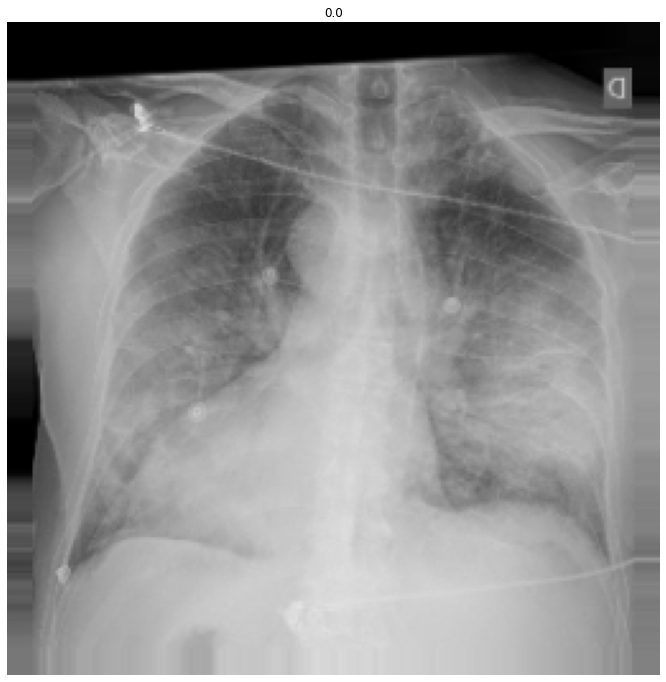

In [11]:
from IPython.core.pylabtools import figsize
for x,y in train_generator:
  plt.figure(figsize(12,12))
  plt.imshow(x[0])
  plt.title(y[0])
  plt.axis('off')
  plt.show()
  break

In [16]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', input_shape = (256,256,3) ))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))


model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [17]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )
hist = model.fit_generator(train_generator, steps_per_epoch= 7, epochs= 20, validation_data=val_generator,validation_steps=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
7/7 [==============================] - 14s 2s/step - loss: 0.8929 - accuracy: 0.6696 - val_loss: 0.6571 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 12s 2s/step - loss: 0.4886 - accuracy: 0.8125 - val_loss: 0.6468 - val_accuracy: 0.5625
Epoch 3/20
7/7 [==============================] - 12s 2s/step - loss: 0.4098 - accuracy: 0.8170 - val_loss: 0.4151 - val_accuracy: 0.9688
Epoch 4/20
7/7 [==============================] - 12s 2s/step - loss: 0.2489 - accuracy: 0.9196 - val_loss: 0.1323 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 12s 2s/step - loss: 0.1599 - accuracy: 0.9330 - val_loss: 0.1283 - val_accuracy: 0.9688
Epoch 6/20
7/7 [==============================] - 11s 2s/step - loss: 0.1989 - accuracy: 0.9241 - val_loss: 0.1402 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 12s 2s/step - loss: 0.3467 - accuracy: 0.9196 - val_loss: 0.0755 - val_accuracy: 1.0000
Epoch 8/20
7/7 [==================

In [18]:
logs = hist.history

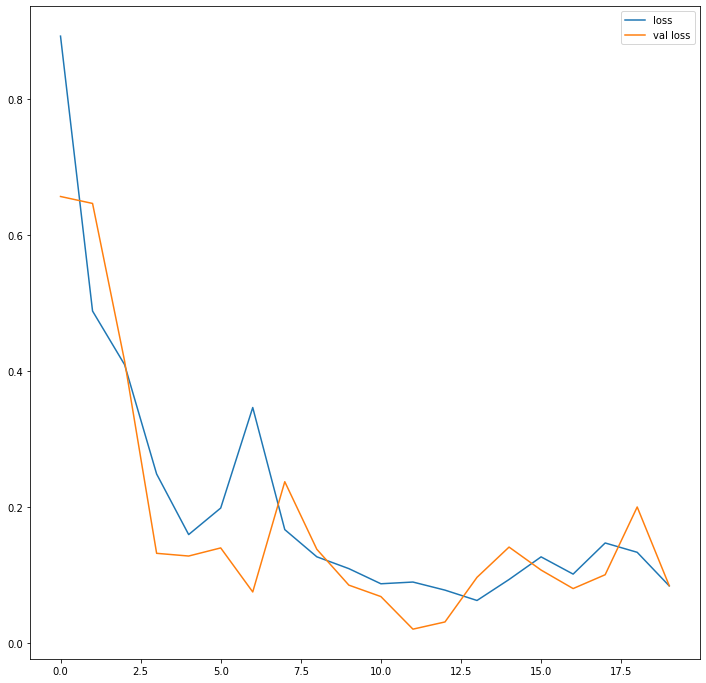

In [19]:
plt.plot(logs['loss'],label = 'loss')
plt.plot(logs['val_loss'], label = 'val loss')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix

In [25]:
x,y = val_generator.next()
yp = model.predict(x)
mat = confusion_matrix(y,yp>=0.5)

In [26]:
print(mat)

[[15  0]
 [ 1 16]]


Precision = 1

Recall = 0.93

Model has high precision and high recall (comparing to rapid antigen test) thus may be a efficient solution considering the scalibilty of this 